# Boston Housing Data

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings("ignore")

### Loading Data From Sklearn Library:

In [242]:
from sklearn.datasets import load_boston

In [243]:
boston = load_boston()

In [244]:
type(boston)

sklearn.utils.Bunch

In [245]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [246]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [247]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [248]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [249]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [250]:
df = pd.DataFrame(boston.data, columns= boston.feature_names)

In [251]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [252]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [254]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Missing Value Treatment:

In [255]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [256]:
# No Missing Values.

### Data Cleaning:

In [257]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [258]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [259]:
df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [260]:
# Only "CHAS" is categorical Variable. Others are Numerical.

# As "CHAS" column has just Two Values, we don't need to Get Dummies for it.

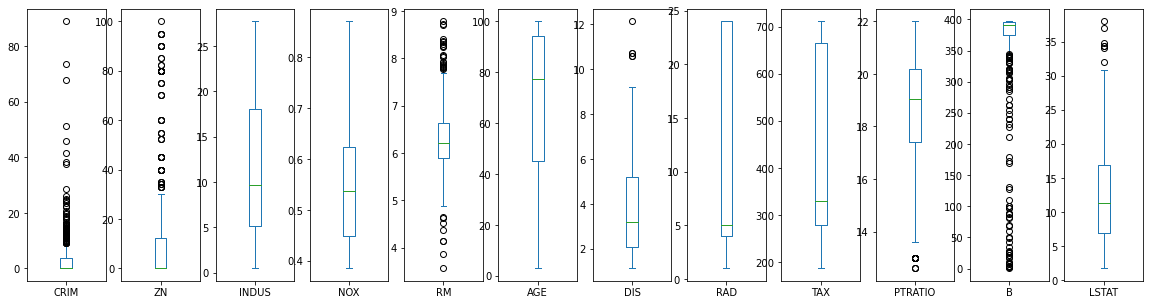

In [261]:
df.drop("CHAS", axis=1).plot(kind= "box", subplots= True, figsize=(20,5))
plt.show()

In [262]:
# Although There are Outliers, we won't delete them as we have just 506 Observations.

# For Small Datasets like this, Outliers more often than not means that Data has More Spread (Variance).

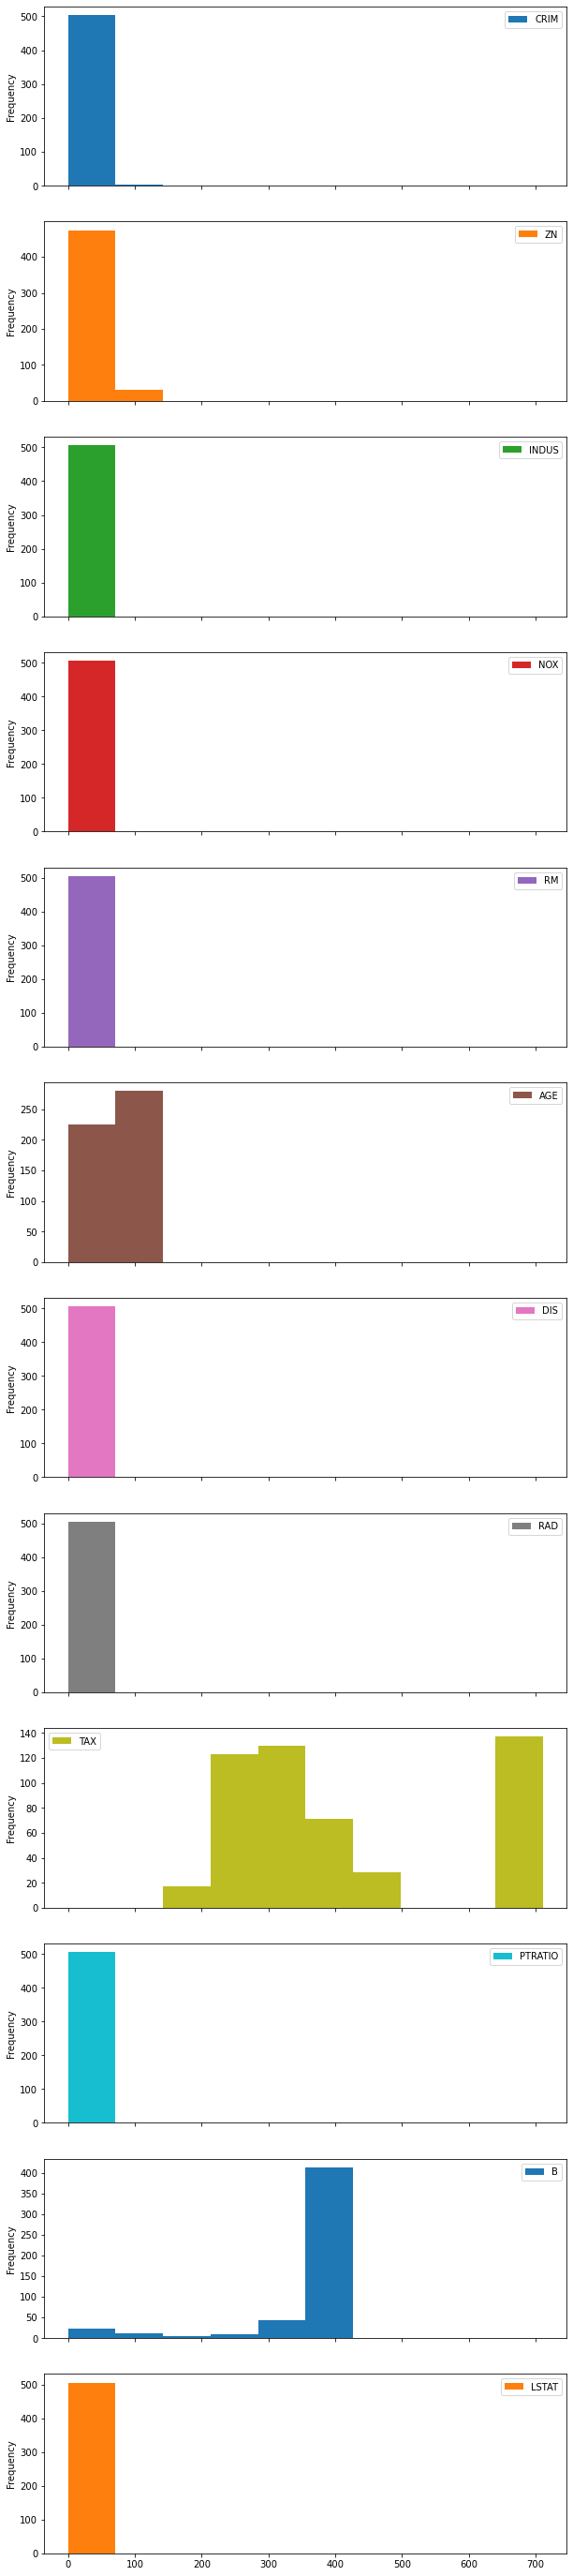

In [263]:
# Distributions:

df.drop("CHAS", axis=1).plot(kind= "hist", subplots= True, figsize=(10,50))
plt.show()

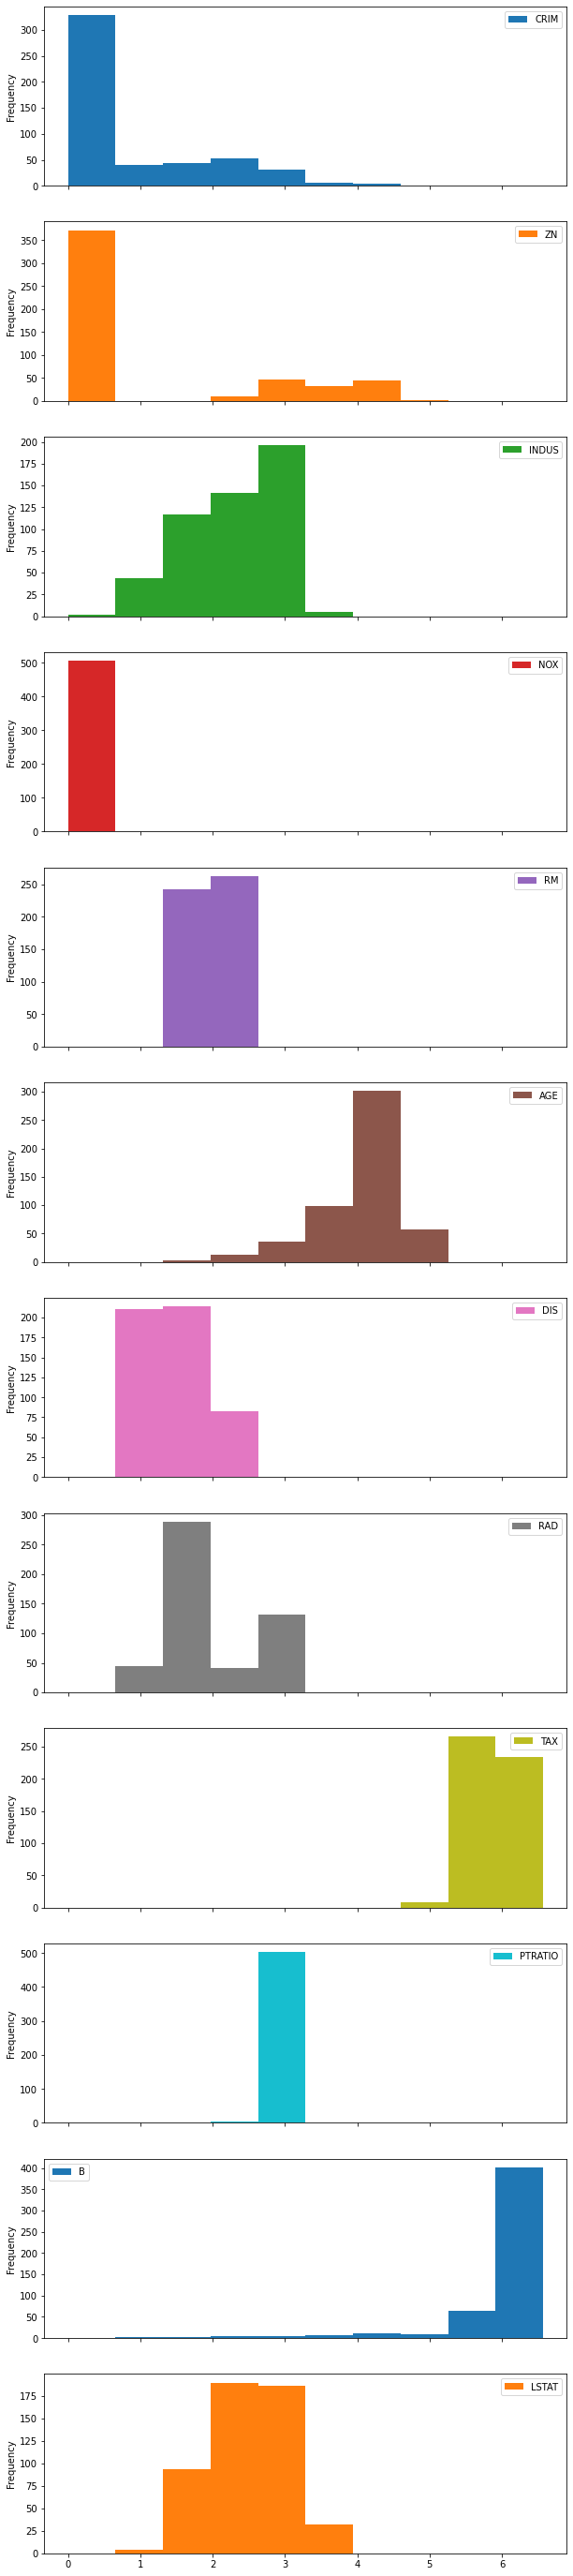

In [264]:
df.drop("CHAS", axis=1).apply(np.log1p).plot(kind= "hist", subplots= True, figsize=(10,50))
plt.show()

In [265]:
# Not Much Changes in Distribution even after Transformations.
# I ahve tried Building Models without Transforming and With Transforming.
# Models Give Better accuracy after Transformation.
# So, we will Transform all Columns except "CHAS" (Categorical) and "TAX" (Already Close to Noormal).

In [266]:
df["CRIM"] = df["CRIM"].apply(np.log1p)
df["ZN"] = df["ZN"].apply(np.log1p)
df["INDUS"] = df["INDUS"].apply(np.log1p)
df["NOX"] = df["NOX"].apply(np.log1p)
df["AGE"] = df["AGE"].apply(np.log1p)
df["DIS"] = df["DIS"].apply(np.log1p)
df["RAD"] = df["RAD"].apply(np.log1p)
df["RM"] = df["RM"].apply(np.log1p)
df["PTRATIO"] = df["PTRATIO"].apply(np.log1p)
df["B"] = df["B"].apply(np.log1p)
df["LSTAT"] = df["LSTAT"].apply(np.log1p)

### Train Test Split:

In [267]:
# Features:
x = df

In [268]:
x.shape

(506, 13)

In [269]:
# target:
y = boston.target

In [270]:
y.shape

(506,)

In [271]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size= 0.3, random_state= 42)

In [272]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### Scalling:

In [273]:
sc = StandardScaler()

#mn= MinMaxScaler()

In [274]:
temp = sc.fit_transform(x_train)

In [275]:
x_train = pd.DataFrame(temp, columns= x_train.columns)

In [276]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.774040,-0.608083,-1.710447,-0.281546,-0.860604,0.193338,-0.053662,1.155660,-0.876649,-1.112790,0.234833,0.285070,-1.165153
1,-0.680192,-0.608083,0.151321,-0.281546,-0.052929,-0.162130,0.305527,-0.368944,-0.131127,0.150088,-0.143836,0.282101,0.205799
2,-0.645720,-0.608083,-0.344396,-0.281546,-0.954419,-0.891025,-0.985889,0.805984,-0.876649,-1.046639,-0.100876,0.295091,-0.073646
3,-0.086291,-0.608083,-0.127727,-0.281546,-0.132463,-0.511235,-1.225062,0.557917,-0.579377,-0.601625,1.129026,0.258527,-0.796752
4,1.994049,-0.608083,0.977153,-0.281546,0.234789,-0.524506,0.269912,-0.257420,1.564721,1.557294,0.829072,0.190181,0.914016


In [277]:
temp = sc.transform(x_test)

In [278]:
x_test = pd.DataFrame(temp, columns= x_test.columns)

In [279]:
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.715863,-0.608083,-1.017102,-0.281546,-0.382912,0.174064,0.558642,-0.423215,-0.336487,-0.667776,-0.677952,0.290054,-0.277348
1,-0.748644,1.672320,-0.442283,3.551814,-0.963836,0.634802,-1.031148,0.367665,-0.579377,-0.920352,-0.230444,0.295091,-1.748082
2,-0.703206,-0.608083,1.589688,-0.281546,0.482713,-0.440746,0.833866,-0.996595,-0.579377,1.827911,0.790784,0.270491,0.908211
3,-0.715991,-0.608083,0.256472,-0.281546,-1.287949,-0.321441,-3.360639,0.878062,-0.579377,-0.613653,0.437797,0.273411,-1.075131
4,0.996548,-0.608083,0.977153,-0.281546,1.336481,0.008750,0.708257,-0.612702,1.564721,1.557294,0.829072,0.252027,0.829013


### Models:

#### 1) Linear Regression:

In [295]:
lr = LinearRegression()

In [296]:
lr.fit(x_train, y_train)

LinearRegression()

In [297]:
pred = lr.predict(x_test)

In [298]:
r2_score(y_test, pred)

0.7635569402365007

In [299]:
np.sqrt(mean_squared_error(y_test, pred))

4.197392560687709

In [300]:
mean_squared_error(y_test, pred)

17.618104308516525

#### 2) ElasticNet Regression using Grid Search:

In [301]:
eln_model = ElasticNet(max_iter= 10000)

In [302]:
param_dict = {"alpha" : [0.01, 0.1, 1, 5, 50,100],
             "l1_ratio" : [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [303]:
grid_model = GridSearchCV(estimator= eln_model, param_grid= param_dict, cv= 10, 
                          scoring= "r2", verbose= 1)

In [304]:
grid_model.fit(x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 50, 100],
                         'l1_ratio': [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='r2', verbose=1)

In [305]:
grid_model.best_score_

0.7488963796511101

In [306]:
grid_model.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=0, max_iter=10000)

In [307]:
mean_squared_error(y_test, pred)

17.618104308516525

#### 3) SGD Regression:

In [308]:
sgd = SGDRegressor()

In [309]:
sgd.fit(x_train, y_train)

SGDRegressor()

In [310]:
pred = sgd.predict(x_test)

In [311]:
r2_score(y_test, pred)

0.759850203463922

In [312]:
mean_squared_error(y_test, pred)

17.894304739896604